# Assignment 02
<p style='text-align:justify;'>Using both statistical analysis and macroeconomic modelling, students must identify a single key primary risk factor or economic variable and its effect on both the economy and methods in portfolio risk management, discussing the validity of their analysis in submission 1.</p>

## Abstract
<p style='text-align:justify;'>In previous assignment, we painted economic background and investment climate of post 1994 South Africa. In this analysis, we attempt to highlight macroeconomic variables that can be potential indicators of economic health of South Africa. Plus, variaous investment models *viz*., Arbitrage Pricing Theory suggest that an asset's returns can be predicted using the linear relationship between the asset’s expected return and a number of macroeconomic variables that capture systematic risk. Traditional approach towards figuring out (statistically) significant variables is a an involved process of fitting several multiple linear regressions to a combination of variables and determining upon their fit statistics. The limitation of this approach is that sometimes, a combination of two variables, otherwise insignificant, might together be statistically significant. In this assignment, we attempt to apply rather a dimensionality technique of PCA to a set of macroeconomic variables and come up with two hyperplains that capture maximum variability among the variables.</p>

## Introduction
<p style='text-align:justify;'>In a nutshett, Principal Component Analysis (PCA) is a method of analysis that involves finding linear combination of a set of variables that has maximum variance and removing its effect, repeating this successively.</p>

let $q$ be unit length vector $q^Tq=1$ and let $q^Tx$ be the length of the axis after projecting $x$ onto a line defined by $q$. Then...the $\vec{q^Tx_i}_q$ takes $q$ and stretches it to the corrosponding projection.
For
\begin{align}
q&=\text{argmin}_q \sum^n_{i=1} \lVert x_i-qq^Tx_i \rVert ^2\text{  subject to }q^Tq=1\\
&=\text{argmin}_q \sum^n_{i=1} x^T_ix_i-q^T\underbrace{(\sum^N_{i=1}x_ix^T_i)}_{=XX^T}q\\
\therefore&=\text{argmax}_q q^T(XX^T)q\;\text{ subject to } q^Tq=1
\end{align}

* $q$ is the first eigenvector of $XX^T$
* $\lambda=q^T(XX^T)q$ is the first eigenvalue.

**In plain English...**
<p style='text-align:justify;'>consider a typical dataset of variables (column) and observations (row). It's only possible to plot 1 through 3 dimensions (variables) of that dataset in a scatter plot; but what about more than three dimensions of data? In simple words, PCA decomposes multiple dimensions into 2-D plot. 
suppose we had just 2 variables. We'll begin by plotting the 2D data. We then calculate mean value of both the variables, which we assign as a centre of the data. Next, we will shift the center of the data to the mean. Now that the data is centered under the origin, we can try to fit a line to it. Ultimately, the line of best fits is the one that minimizes the average distances between the datapoints if projected on that line or the one that maximizes the distances from the projected points to the origin. The maximized distances are then squared and their sum is Sum of Squared(distances). This Sum of Squared(distances) is the largest and is called Principal Component 1. The next component will be the line orthogonal to PC1.</p>

## Methodology
<p style='text-align:justify;'>In this assignment, we shall obtain the below mentioned macroeconomic variables from St. Louis FRED dataset. For a linear model (or any model for that matter...) to be unbiased (complet elimination of bias is not practicable, so we'll settle with 'minimum bias') correlation between each independent variable and target variable should be maximized and the correlation between the independent variables should be minimized. Therefore, we shall eliminate redundant variables. The final data will then be standardized. We shall apply PCA on this standardized data.</p>

In [5]:
'''Downloading requisite libraries'''
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''selecting standard ipynb settings'''
%matplotlib inline

In [3]:
np.random.seed(0)

In [10]:
plt.rcParams['figure.figsize'] = [10,6]

In [4]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)

In [50]:
'''Download the data from here.'''
# wget.download(url='https://raw.githubusercontent.com/NeelkanthMehta/MSFE_660/module_05/fredexport.csv', out='dataset.csv')

'Download the data from here.'

#### Explanation of variables
<p style='text-align:justify;'>We sourced the data from St. Louis FRED database. 
The dataset is far from ideal, however, its' monthly, as opposed to quaterly or annual.
The following is a list of variables imported along with their chagacteristics (all data are seasonally unadjusted):</p>

01. EXSFUS: exchange rate based on ZA rand to 1 USD
02. IRLTLT01ZAM156N: Long-Term govt. bond yields in percentage
03. INTGSBZAM193N: govt. securities yields in percentage
04. INTGSTZAM193N: Treasury rates
05. MYAGM0ZAM189N: M0 in billion rands
06. MYAGM1ZAM189N: M1 in billion rands
07. MYAGM2ZAM189N: M2 in billion rands
08. MYAGM3ZAM189N: M3 in billion rands
09. TRESEGZAM052N: Total Reserves excluding gold (excluding drawing rights)
10. XTEITT01ZAM156N: Ratio of Exports to Imports in percentage
11. CPALTT01ZAM657N: CPI growth rate in percentage terms

In [6]:
'''set appropriate 'pwd' before executing this code, or change 'filepath...' argument below as appropriate. Ensure you have 
the datafile first'''
df01 = pd.read_csv(filepath_or_buffer='fredexport.csv', index_col=0)
df01.index = pd.to_datetime(arg=df01.index, errors='ignore')

In [7]:
'''Only the dataset between 1980 to 2017-05 have non-null values'''
variables = df01.loc['1980-01':'2017-05',:]
variables = variables.convert_objects(convert_numeric=True)
variables.ffill(axis=1,inplace=True)
variables.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 449 entries, 1980-01-01 to 2017-05-01
Data columns (total 11 columns):
CPI               449 non-null float64
exchange_rate     449 non-null float64
gsec_int_rates    449 non-null float64
t_int_rates       449 non-null float64
LTg_yields        449 non-null float64
M0                449 non-null float64
M1                449 non-null float64
M2                449 non-null float64
M3                449 non-null float64
total_reserves    449 non-null float64
Ex_Im             449 non-null float64
dtypes: float64(11)
memory usage: 42.1 KB


C:\Users\neelkanth mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


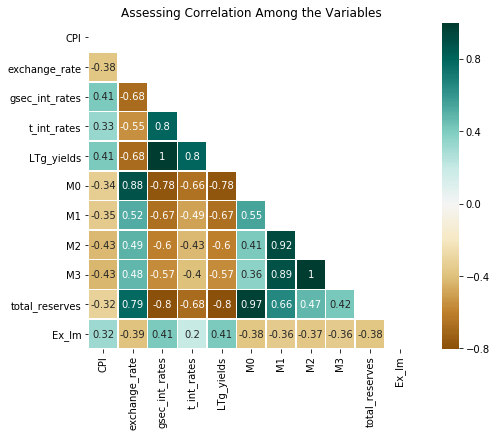

In [12]:
# correlogram
corr = variables.corr()

# Generating mask for upper triangle
mask = np.zeros_like(a=corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, annot=True, center=0, square=True, linewidths=0.5, cmap="BrBG", mask=mask);
plt.title('Assessing Correlation Among the Variables')
plt.show()

<p style='text-align:justify;'>From the above heatmap of correlogram, we can see high level of correlation present amongst the variables. The result of any model fitted on a such highly correlated data will be biased.<br>We therefore need to filter out redundant variables.<br>By heuristic approach, i.e., close observation of the above graph, one could safely conclude the variable of choice must be one from each category, *viz*., one of the interest rates, one of the money supply, exchange rate, inflation rate and trade balance.<br>The set of variables, with least overall correlation, to be used are:</p>

1. LT govt. yields.
2. M3 money supply.
3. CPI
4. Export-to-Import ratio.
5. Exchange Rate

In [13]:
final_vars = variables[['LTg_yields', 'exchange_rate', 'CPI', 'M3', 'Ex_Im']]

The variables have different unit of measures, *viz*., absolute currency, percentage, ratio etc.; we will sandardize the variables in order to be able to apply PCA to the variables.

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
variables_std = pd.DataFrame(data=std.fit_transform(final_vars), index=final_vars.index, columns=final_vars.columns.tolist())

In [15]:
variables_std.sample(10)

,LTg_yields,exchange_rate,CPI,M3,Ex_Im
DATE,,,,,
1990-05-01,1.105913,-0.820535,0.426399,-0.731462,0.693246
1984-07-01,0.812094,-1.138562,0.674997,-1.042351,0.226438
2011-03-01,-0.950824,0.365092,0.890448,1.729422,0.086396
2008-07-01,-0.657004,0.563161,1.188765,1.230397,-1.220665
1999-03-01,0.812094,0.172602,-1.181198,0.241101,-0.100327
1991-03-01,1.105913,-0.817745,0.244094,-0.663049,0.553203
1981-01-01,-0.069365,-1.350580,-1.181198,-1.126251,0.693246
2007-09-01,-1.244643,0.420886,-0.236528,1.121111,-0.847219
2002-08-01,-0.363185,1.394495,-0.286247,1.045594,0.413161


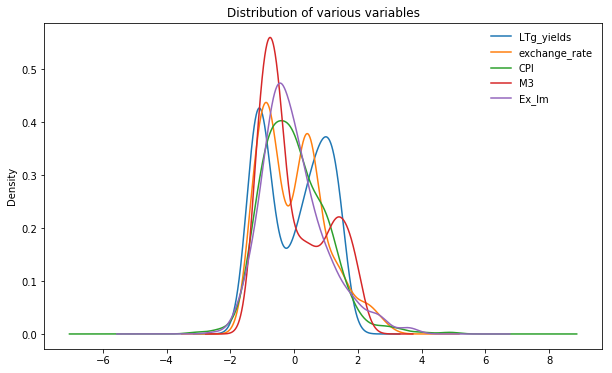

In [48]:
plt.rcParams['figure.figsize'] = (10,6)
for i in variables_std.columns:
    variables_std[i].plot.kde(alpha=1);
plt.legend(labels=variables_std.columns, frameon=False, loc='best')
plt.title('Distribution of various variables')
plt.show()

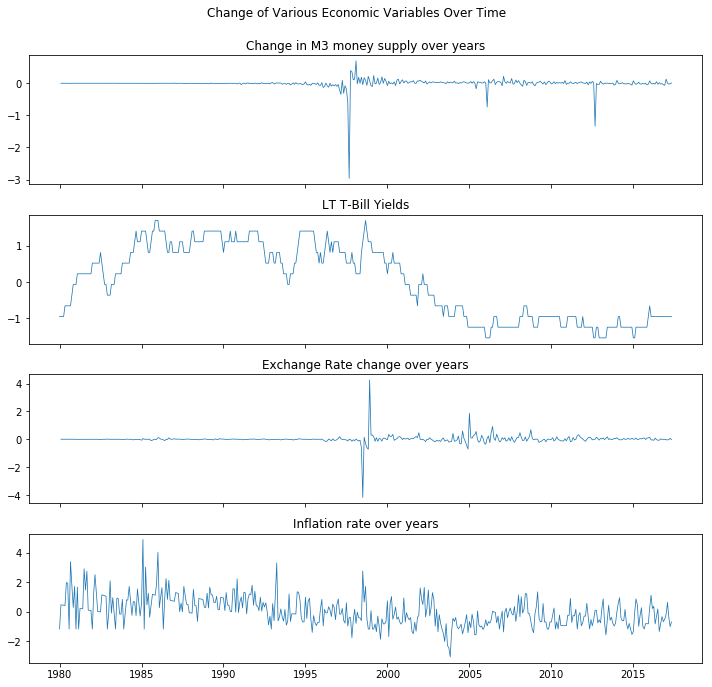

In [49]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True);
fig.set_size_inches(10,10)
ax1.plot(variables_std['M3'].pct_change()[1:], linewidth=0.75)
# ax1.legend(labels=['M3'], frameon=False, loc='best')
ax1.set_title('Change in M3 money supply over years')
ax2.plot(variables_std['LTg_yields'], linewidth=0.75);
# ax2.legend(labels=['LTg_yield'],loc='best', frameon=False)
ax2.set_title('LT T-Bill Yields')
ax3.plot(variables_std['exchange_rate'].pct_change()[1:], linewidth=0.75)
ax3.set_title('Exchange Rate change over years')
ax4.plot(variables_std['CPI'], linewidth=0.75)
ax4.set_title('Inflation rate over years')
plt.suptitle('Change of Various Economic Variables Over Time')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [21]:
'''Performing PCA on standardized data'''
from sklearn.decomposition import PCA
components = PCA()
scaled_variables = components.fit_transform(variables_std.T)

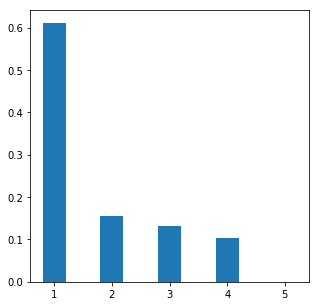

In [36]:
plt.figure(figsize=(5,5))
plt.bar(x=range(1,6,1), height=components.explained_variance_ratio_, width=0.4);

2 components explain ~95% of variation; therefore we shall redecompose to just 2 variables

In [37]:
'''Performing PCA on standardized data to come up with two components'''
components_2 = PCA(n_components=2)
scaled_variables_2 = components_2.fit_transform(variables_std.T)
p_components = pd.DataFrame(data=scaled_variables_2, columns=['comp_1', 'comp_2'], index=variables_std.columns.tolist())

print(f"{components_2.explained_variance_ratio_}")
print('='*80)
p_components

[0.61137347 0.15536672]


,comp_1,comp_2
LTg_yields,-15.811805,-1.599372
exchange_rate,19.424827,3.454176
CPI,-11.444726,12.765799
M3,18.748392,-3.569626
Ex_Im,-10.916689,-11.050977


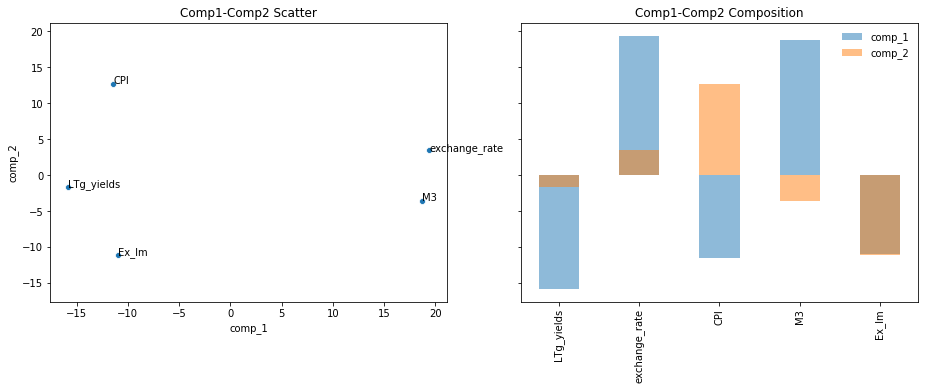

In [38]:
plt.rcParams['figure.figsize'] = (13,6)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True);
sns.scatterplot(x=p_components.comp_1, y=p_components.comp_2, ax=ax1);
ax1.set_title('Comp1-Comp2 Scatter')
# ax1.legend(title=None, frameon=False, loc='best')
for sample in p_components.index:
    ax1.annotate(sample, (p_components.comp_1.loc[sample], p_components.comp_2.loc[sample]))
ax2.bar(x=p_components.index, height=p_components.comp_1, width=0.5, alpha=0.5);
ax2.bar(x=p_components.index, height=p_components.comp_2, width=0.5, alpha=0.5);
ax2.legend(labels=p_components.columns, loc='best', frameon=False, title=None)
ax2.set_title('Comp1-Comp2 Composition')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Comments on the graph:
In machine learning parlance; the above analysis suggests
1. Exchange rate could be most sensitive variable to consider while pricing an asset. The fact that South African Rand has been declining in value compared USD over twenty-three year period supports the results.
2. These 2 highest features is next followed by Net-exports, explaining significant bit in variability. The thrust of RDP and GEAR programs were to move the base of the local economy from mining based to manufacturing base. Until period 2008-09, this strategy did bear fruits, until the global recession hit its shores.

Nonetheless...the above drawn conclusions should be taken with 'grain of salt':
1. Note 01: the quality of this analysis is directly dependent to the quality of the data. Good, unadjusted and granular dataset is difficult to come by. We found one on St. Louis FRED database.<br>
2. Note 02: this is a 'quick-n-dirty' analysis. The variables in the data do not depict gaussian distribution; neither is the time-series stationary.


In [75]:
from sklearn.linear_model import LinearRegression